In [1]:
!pip install scikit-learn

In [2]:
!pip install seaborn

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
penguin_df = pd.read_csv('./penguins_lter.csv')
penguin_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [5]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

- studyName: 연구 이름
- Sample Number: 샘플 번호(고유 번호)
- Species: 펭귄의 종
- Region: 지역
- Island: 펭귄이 수집된 섬
- Stage: 펭귄의 생애 단계
- Individual ID: 특정 펭귄을 식별하기 위한 고유 ID.
- Clutch Completion: 산란 완료 여부(예: "Yes", "No")
- Date Egg: 펭귄이 알을 낳은 날짜(태어난 날)
- Culmen Length (mm): 펭귄의 부리 길이
- Culmen Depth (mm): 펭귄의 부리 깊이
- Flipper Length (mm): 펭귄의 날개 길이
- Body Mass (g): 펭귄의 몸무게
- Sex: 펭귄의 성별
- Delta 15 N (o/oo): 질소 동위원소 비율
- Delta 13 C (o/oo): 탄소 동위원소 비율
- Comments: 주석, 추가적인 주석이나 설명.

In [6]:
penguin_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [7]:
# studyName, Sample Number, Stage, Individual ID, Clutch Completion,
# Date Egg, Comments, Delta 15 N (o/oo), Delta 13 C (o/oo)는 종과 연관 없음.

print(penguin_df['Region'].unique())
# 지역이 하나밖에 없으므로 삭제

['Anvers']


In [8]:
# 제거할 컬럼
delete_columns = ['Region', 'studyName', 'Sample Number', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Comments', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

penguin_df = penguin_df.drop(columns= delete_columns)

In [9]:
penguin_df

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
penguin_df.isna().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [11]:
# Sex의 결측값 데이터 삭제
penguin_df = penguin_df.dropna(subset=['Sex'])
penguin_df.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [12]:
print(penguin_df.shape) # 총 데이터수 & 칼럼 수
penguin_df.info()

(334, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              334 non-null    object 
 1   Island               334 non-null    object 
 2   Culmen Length (mm)   334 non-null    float64
 3   Culmen Depth (mm)    334 non-null    float64
 4   Flipper Length (mm)  334 non-null    float64
 5   Body Mass (g)        334 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [13]:
print(penguin_df['Sex'].unique())
print(penguin_df['Island'].unique())

['MALE' 'FEMALE' '.']
['Torgersen' 'Biscoe' 'Dream']


In [14]:
penguin_df[penguin_df['Sex']=='.']

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
336,Gentoo penguin (Pygoscelis papua),Biscoe,44.5,15.7,217.0,4875.0,.


In [15]:
# 'Sex' 컬럼 값이 '.' 인 행 삭제
penguin_df = penguin_df[penguin_df['Sex'] != '.']
penguin_df.shape

(333, 7)

In [16]:
# 특성과 타겟 변수 분리
X = penguin_df.drop('Species', axis=1)
y = penguin_df['Species']

### 원핫인코딩
- 범주형 변수의 고유값을 숫자로 매핑하는 방법
- 주로 목표 변수(타겟 변수)에 적용
- 순서가 있는 데이터에서는 사용이 적절하지 않을 수 있음
- 범주 간의 상대적인 순서가 부여되는 경우 모델이 잘못 학습할 위험 존재
### 라벨 인코딩
- 범주형 변수를 이진형 벡터로 변환하는 방법
- 주로 설명 변수(특성 변수)에 적용
- 순서가 있는 데이터에 적합
- 범주형 변수의 고유값이 많을 경우 변수의 차원 -> 복잡성 증가 -> 학습 및 예측 시간 증가

In [17]:
# 범주형 변수 원핫인코딩 적용
X = pd.get_dummies(X, drop_first=True)

In [18]:
# 타겟 변수 라벨 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
# 학습/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## AdaBoost
- 약한 학습기(weak learner)를 순차적으로 학습하여 강력한 앙상블 모델을 만드는 앙상블 학습 기법 중 하나
- 잘못 분류된 데이터에 높은 가중치가 부여되어 다음 학습기가 더 효과적으로 수정할 수 있게 함

In [20]:
rs = 1

In [21]:
# 기본 학습자를 DecisionTreeClassifier로 설정
estimator = DecisionTreeClassifier(max_depth=1, random_state=rs)
# estimator = RandomForestClassifier(random_state=1)
# estimator = SVC(kernel='linear')

# AdaBoost 모델 생성
ab = AdaBoostClassifier(estimator=estimator, algorithm='SAMME', random_state=rs)

## AdaBoost 파라미터
### estimator
- 결정 트리(Decision Tree)를 기본 약한 학습기로 사용
- 로지스틱 회귀(Logistic Regression), 서포트 벡터 머신(Support Vector Machine), 랜덤 포레스트(Random Forest) 등의 모델을 기본 약한 학습기로 사용가능

### estimator__max_depth
- 결정 트리의 최대 깊이를 지정
- 깊이가 깊을수록 모델의 복잡성이 증가 but 훈련데이터에 과적합될 가능성도 높아짐

### learning_rate(학습률)
- 각 트리가 현재 모델에 기여하는 정도를 조절하는 파라미터
- 학습률이 작을수록 각 트리가 모델에 미치는 영향이 작아짐 -> 모델이 더욱 안정적으로 수렴

### n_estimators
- 사용할 결정 트리의 개수
- 모델의 복잡도를 조절하고, 앙상블의 크기를 결정
- 더 많은 트리를 사용 -> 모델 성능 향상, but 학습 시간 증가 및 과적합의 위험 존재

In [22]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 3, 5]
}

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=ab, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=1),
                                          random_state=1),
             param_grid={'estimator__max_depth': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [23]:
# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'estimator__max_depth': 3, 'learning_rate': 1, 'n_estimators': 50}


In [24]:
# 최적 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [25]:
# 성능 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0
                                           precision    recall  f1-score   support

      Adelie Penguin (Pygoscelis adeliae)       1.00      1.00      1.00        28
Chinstrap penguin (Pygoscelis antarctica)       1.00      1.00      1.00        17
        Gentoo penguin (Pygoscelis papua)       1.00      1.00      1.00        22

                                 accuracy                           1.00        67
                                macro avg       1.00      1.00      1.00        67
                             weighted avg       1.00      1.00      1.00        67



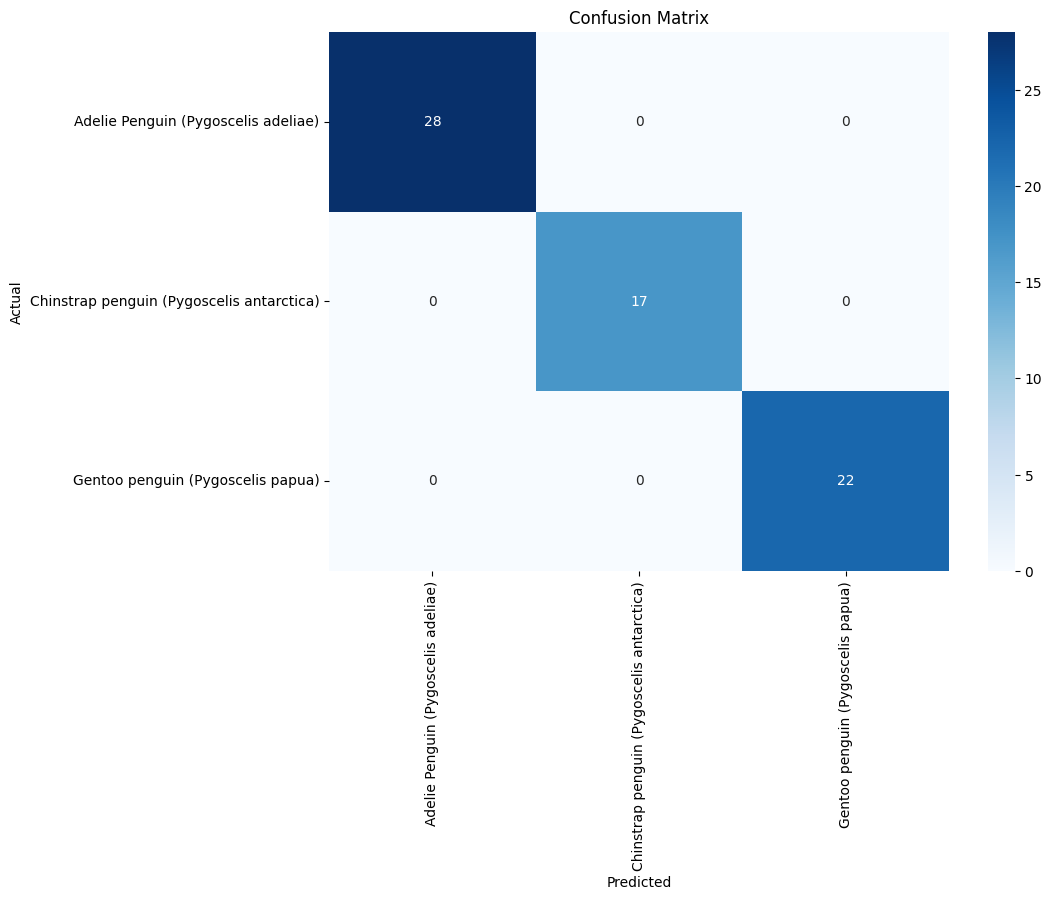

In [26]:
# 혼돈 행렬 계산 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# AdaBoost의 피처 중요도 추출
feature_importances = best_model.feature_importances_

# 피처 중요도를 DataFrame으로 정리
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print(importance_df)

               Feature  Importance
0   Culmen Length (mm)    0.292657
2  Flipper Length (mm)    0.198377
1    Culmen Depth (mm)    0.165659
4         Island_Dream    0.149384
3        Body Mass (g)    0.094966
6             Sex_MALE    0.089341
5     Island_Torgersen    0.009615


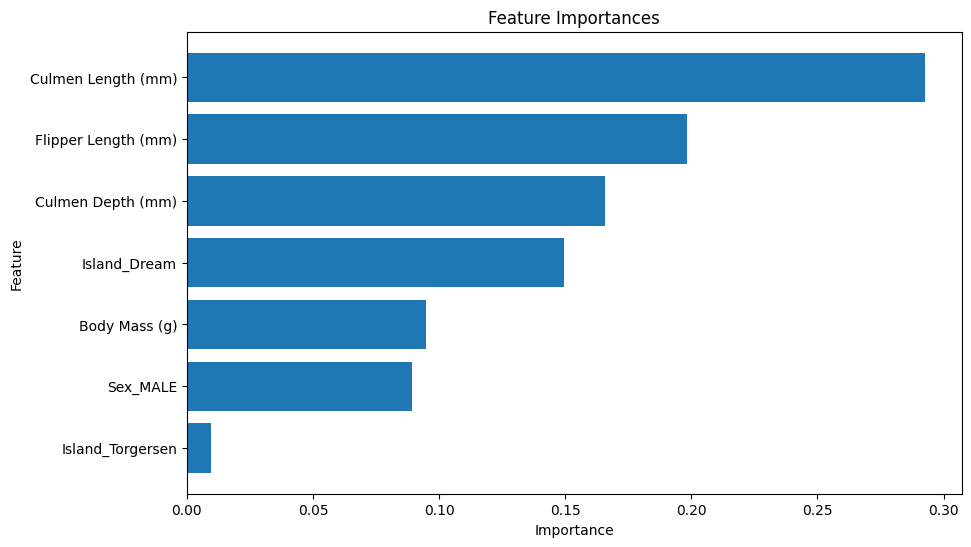

In [27]:
import matplotlib.pyplot as plt

# 피처 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [28]:
correlation_df = le.fit_transform(penguin_df['Species'])
correlation_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

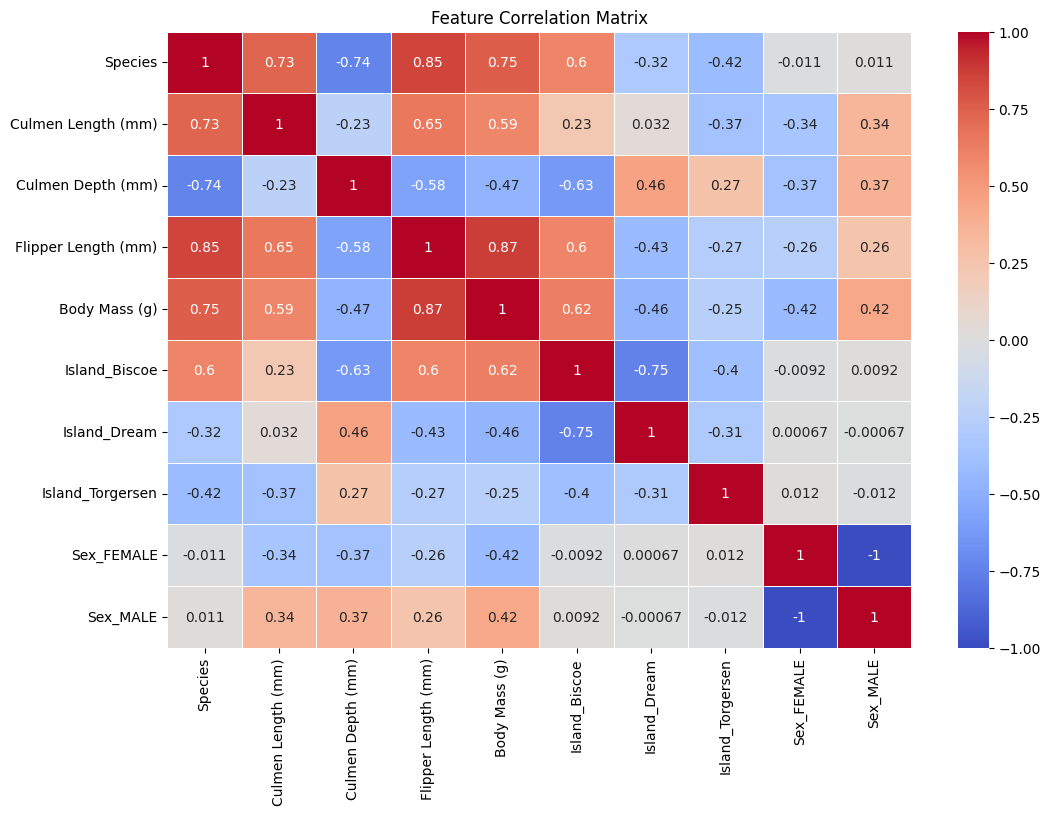

In [29]:
# 피처들 간의 상관계수 계산
correlation_df = penguin_df
correlation_df['Species'] = le.fit_transform(correlation_df['Species'])
correlation_df = pd.get_dummies(correlation_df, drop_first=False)
correlation_matrix = correlation_df.corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### Sex, Island 를 라벨 인코딩으로 했을 경우

In [30]:
# # 'Sex' 컬럼의 값을 변경(남: -1, 여: 1)
# penguin_df['Sex'] = penguin_df['Sex'].replace({'MALE': -1, 'FEMALE': 1})

# # 'Island' 컬람 값을 변경('Torgersen'=-1, 'Dream'=0, 'Biscoe'=1 )
# penguin_df['Island'] = penguin_df['Island'].replace({'Torgersen': -1, 'Dream': 0, 'Biscoe': 1})